In [1]:
import pandas as pd             # Untuk manipulasi dan analisis data I/O dataframe (ex read dataset)
import numpy as np              # Untuk operasi numerik dan komputasi
import matplotlib.pyplot as plt # Untuk visualisasi grafik dan plot
import seaborn as sns           # Dibangun di atas plt, menyediakan visualisasi yang lebih menarik
import warnings                 # Handling peringatan yang ditampilkan
warnings.filterwarnings("ignore")

In [2]:
! pip install kaggle

     -------------------------------------- 83.6/83.6 kB 928.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 78.2/78.2 kB ? eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110697 sha256=9c2a3ea0bd0035851ba2fd24971b40c70a6ec56ee9684557736491788b060dc1
  Stored in directory: c:\users\andrian ang\appdata\local\pip\cache\wheels\32\9a\1c\87cb7688472c9240fa865b94c59f8e63c8dd2a8cca1fd4dbb6
Successfully built kaggle



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
train_df = pd.read_csv('twitter_training.csv')
train_df.columns = ['TweetID', 'Entity', 'Sentiment', 'Content']
train_df

,TweetID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetID    74681 non-null  int64 
 1   Entity     74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Content    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
test_df = pd.read_csv('twitter_validation.csv')
test_df.columns = ['TweetID', 'Entity', 'Sentiment', 'Content']
test_df

,TweetID,Entity,Sentiment,Content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetID    74681 non-null  int64 
 1   Entity     74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Content    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [10]:
test_df = pd.read_csv('twitter_validation.csv')
test_df.columns = ['TweetID', 'Entity', 'Sentiment', 'Content']
test_df

,TweetID,Entity,Sentiment,Content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [11]:
nan_row = train_df[train_df['Content'].isna()]
nan_row

,TweetID,Entity,Sentiment,Content
60,2411,Borderlands,Neutral,NaN
552,2496,Borderlands,Neutral,NaN
588,2503,Borderlands,Neutral,NaN
744,2532,Borderlands,Positive,NaN
1104,2595,Borderlands,Positive,NaN
...,...,...,...,...
73971,9073,Nvidia,Positive,NaN
73972,9073,Nvidia,Positive,NaN
74420,9154,Nvidia,Positive,NaN
74421,9154,Nvidia,Positive,NaN


In [44]:
train_df.drop(nan_row.index, axis=0, inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73995 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetID    73995 non-null  int64 
 1   Entity     73995 non-null  object
 2   Sentiment  73995 non-null  object
 3   Content    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [45]:
train_duplicate = train_df[train_df.duplicated(subset=['Entity', 'Sentiment', 'Content'], keep=False)]
train_duplicate

,TweetID,Entity,Sentiment,Content
10,2402,Borderlands,Positive,was
17,2404,Borderlands,Positive,that was the first borderlands session in a lo...
19,2404,Borderlands,Positive,that was the first borderlands session in a lo...
24,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
...,...,...,...,...
74590,9185,Nvidia,Neutral,you
74615,9190,Nvidia,Positive,This news about the Nvidia 3000 series is ligi...
74618,9190,Nvidia,Positive,This news about the Nvidia 3000 series is ligi...
74634,9193,Nvidia,Positive,Love EVERYTHING about it.


In [47]:
test_duplicate = test_df[test_df.duplicated(subset=['Entity', 'Sentiment', 'Content'], keep=False)]
test_duplicate

,TweetID,Entity,Sentiment,Content


In [48]:
train_df.drop(train_duplicate.index, axis=0, inplace=True)

In [49]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68590 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetID    68590 non-null  int64 
 1   Entity     68590 non-null  object
 2   Sentiment  68590 non-null  object
 3   Content    68590 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.6+ MB


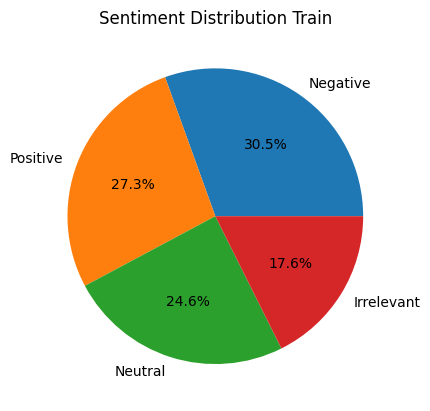

In [17]:
sentiment_counts = train_df['Sentiment'].value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')

plt.title('Sentiment Distribution Train')

plt.show()

In [18]:
#Word Count
train_df['Word_Count'] = train_df.apply(lambda x: len(str(x['Content']).split()), axis=1)


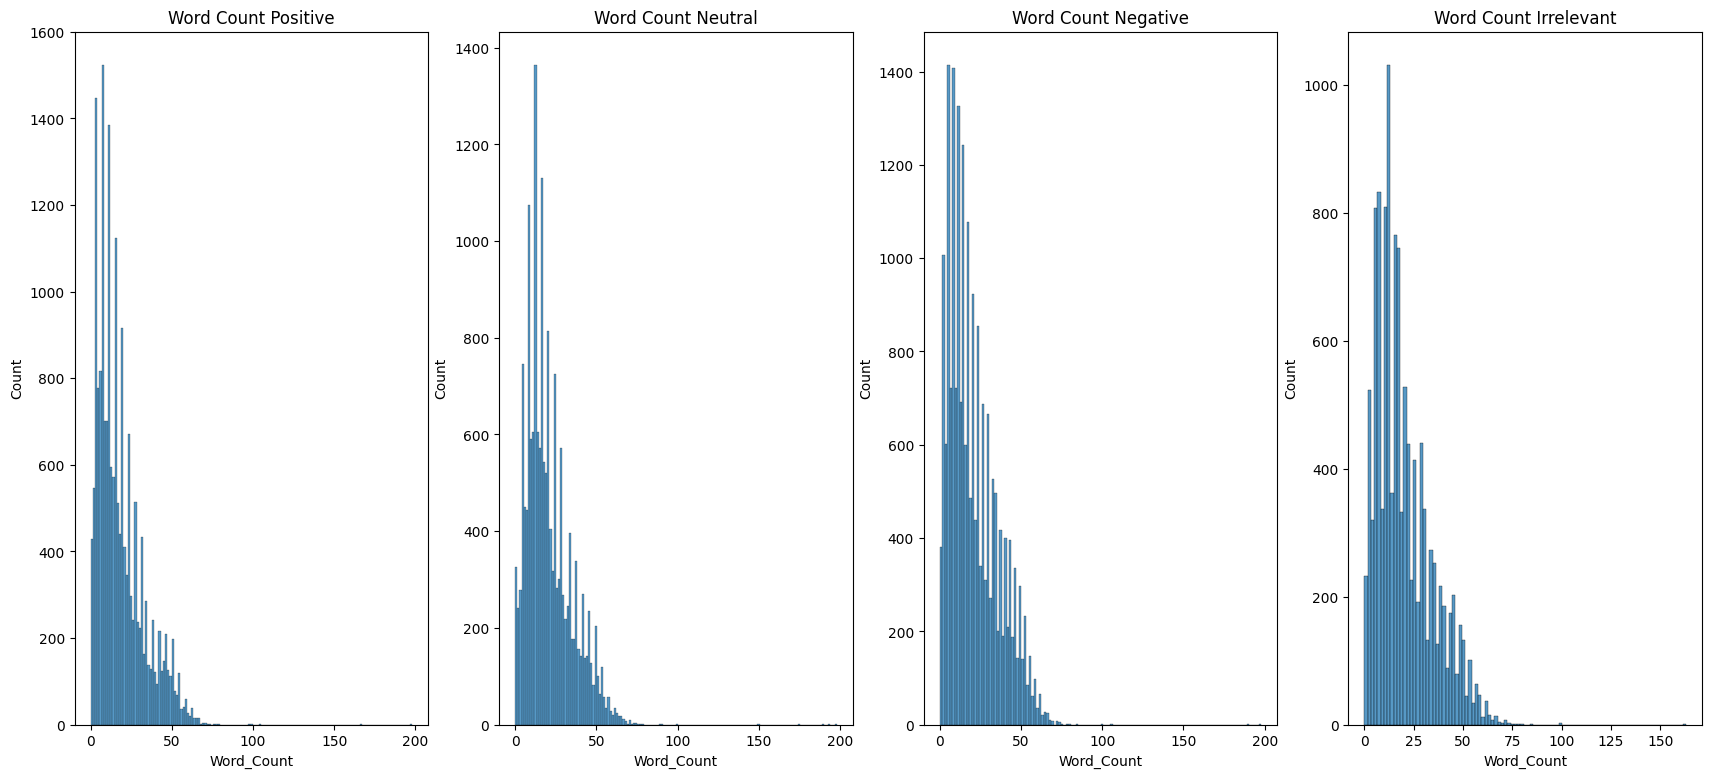

In [19]:
fig = plt.figure(figsize=(21,9))

n = 1

for i in range(len(train_df['Sentiment'].unique())):
  plt.subplot(1, len(train_df['Sentiment'].unique()), n)
  n += 1
  sns.histplot(x = "Word_Count", data=train_df[train_df['Sentiment'] == train_df['Sentiment'].unique()[i]])
  plt.title(f'Word Count {train_df["Sentiment"].unique()[i]}')
plt.show()

In [50]:
contain_unk = train_df[train_df['Content'] == "<unk>"]

train_df.drop(contain_unk.index, axis=0, inplace=True)


In [51]:
train_df['Word Count'] = train_df['Content'].apply(lambda x: int(len(x.split())))
train_df['Word Len'] = train_df['Content'].apply(lambda x: int(len(x)))

word_below_3  = train_df[(train_df['Word Count'] < 3) & (train_df['Word Len'] < 10)]
train_df.drop(word_below_3.index, axis=0, inplace=True)


In [52]:
import re

# Function to remove links from text
def remove_links(text):
    # Define a regular expression for identifying links
    link_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|\bwww\.[^\s]+\b')

    # Replace links with an empty string
    return link_pattern.sub('', text)

# Apply the function to the 'Content' column
train_df['Content'] = train_df['Content'].apply(remove_links)


In [53]:
train_df

,TweetID,Entity,Sentiment,Content,Word Count,Word Len
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,12,51
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,10,50
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,10,51
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,12,57
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,10,53
...,...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,26,128
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,23,117
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,25,125
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,32,159


In [54]:
!pip install emoji

     -------------------------------------- 358.9/358.9 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
import emoji

# Function to remove emojis from text
def remove_emojis(text):
    return emoji.demojize(text)

# Apply the function to the 'Content' column
train_df['Content'] = train_df['Content'].apply(remove_emojis)


In [58]:
train_df

,TweetID,Entity,Sentiment,Content,Word Count,Word Len
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,12,51
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,10,50
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,10,51
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,12,57
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,10,53
...,...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,26,128
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,23,117
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,25,125
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,32,159


In [59]:
!pip install nltk


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
!pip install slang-translator

ERROR: Could not find a version that satisfies the requirement slang-translator (from versions: none)
ERROR: No matching distribution found for slang-translator

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
import nltk
from nltk.corpus import wordnet

nltk.download('wordnet')

# Function to expand slangs using WordNet (part of NLTK)
def expand_slangs(text):
    words = text.split()
    expanded_text = ' '.join(wordnet.synsets(word)[0].lemmas()[0].name() if wordnet.synsets(word) else word for word in words)
    return expanded_text

# Apply the function to the 'Content' column
train_df['Expanded Content'] = train_df['Content'].apply(expand_slangs)

# Display the DataFrame with expanded slangs
print("\nDataFrame with expanded slangs:")
print(train_df[['Content', 'Expanded Content']])

[nltk_data] Downloading package wordnet to C:\Users\Andrian
[nltk_data]     Ang\AppData\Roaming\nltk_data...



DataFrame with expanded slangs:
                                                 Content  \
0      I am coming to the borders and I will kill you...   
1      im getting on borderlands and i will kill you ...   
2      im coming on borderlands and i will murder you...   
3      im getting on borderlands 2 and i will murder ...   
4      im getting into borderlands and i can murder y...   
...                                                  ...   
74676  Just realized that the Windows partition of my...   
74677  Just realized that my Mac window partition is ...   
74678  Just realized the windows partition of my Mac ...   
74679  Just realized between the windows partition of...   
74680  Just like the windows partition of my Mac is l...   

                                        Expanded Content  
0      iodine americium approach to the boundary_line...  
1      im acquiring on borderland and iodine volition...  
2      im approach on borderland and iodine volition ...  
3      im 

In [62]:
!pip install langdetect

     -------------------------------------- 981.5/981.5 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993253 sha256=d9bfd1a73c7757a94348b49e5aee272b533c7d6c75b8bc427cb5aaa0c7fbdd6b
  Stored in directory: c:\users\andrian ang\appdata\local\pip\cache\wheels\6a\67\f8\9cf1a8ff87e0b37f738769df49cc142a655489a6d27b68089f
Successfully built langdetect



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
from langdetect import detect, LangDetectException

# Function to detect language with error handling
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException as e:
        # Handle the exception, e.g., by returning a default language
        print(f"Error: {e}")
        return "unknown"

# Add a new column 'Language' containing the detected language for each row
train_df['Language'] = train_df['Content'].apply(detect_language)

# Filter the DataFrame to include only English content
english_df = train_df[train_df['Language'] == 'en']

# Display the DataFrame with English content
print("\nDataFrame with English content:")
print(english_df[['Content', 'Language']])


Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.
Error: No features in text.

DataFrame with English content:
                                                 Content Language
0      I am coming to the borders and I will kill you...       en
1      im getting on borderlands and i will kill you ...       en
2      im com

In [70]:
# Filter the DataFrame to include only English content
english_df = train_df[train_df['Language'] == 'en']

# Display the DataFrame with English content
print("\nDataFrame with English content:")
print(english_df[['Content', 'Language']])


DataFrame with English content:
                                                 Content Language
0      I am coming to the borders and I will kill you...       en
1      im getting on borderlands and i will kill you ...       en
2      im coming on borderlands and i will murder you...       en
3      im getting on borderlands 2 and i will murder ...       en
4      im getting into borderlands and i can murder y...       en
...                                                  ...      ...
74676  Just realized that the Windows partition of my...       en
74677  Just realized that my Mac window partition is ...       en
74678  Just realized the windows partition of my Mac ...       en
74679  Just realized between the windows partition of...       en
74680  Just like the windows partition of my Mac is l...       en

[63676 rows x 2 columns]


In [76]:
from transformers import DistilBertTokenizer, TFDistilBertModel
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

# Load and preprocess the data
data = train_df[['Content', 'Sentiment', 'Entity']]
data['Sentiment_label'] = pd.Categorical(data['Sentiment'])
data['Sentiment'] = data['Sentiment_label'].cat.codes
data['Entity_label'] = pd.Categorical(data['Entity'])
data['Entity'] = data['Entity_label'].cat.codes

# Split the data into training and testing sets
data_train, data_test = train_test_split(data, test_size=0.1)

# Extract the training and testing texts, sentiment labels, and category labels
train_texts = data_train['Content'].tolist()
train_sentiment_labels = data_train['Sentiment'].tolist()
train_category_labels = data_train['Entity'].tolist()

test_texts = data_test['Content'].tolist()
test_sentiment_labels = data_test['Sentiment'].tolist()
test_category_labels = data_test['Entity'].tolist()

# Tokenize the texts
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Convert the sentiment labels to one-hot encoding
num_sentiment_labels = len(data['Sentiment_label'].cat.categories)
train_sentiment_labels_encoded = tf.one_hot(train_sentiment_labels, num_sentiment_labels)
test_sentiment_labels_encoded = tf.one_hot(test_sentiment_labels, num_sentiment_labels)

# Convert the category labels to one-hot encoding
num_category_labels = len(data['Entity_label'].cat.categories)
train_category_labels_encoded = tf.one_hot(train_category_labels, num_category_labels)
test_category_labels_encoded = tf.one_hot(test_category_labels, num_category_labels)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask'], 'categories': train_category_labels_encoded}, train_sentiment_labels_encoded))
test_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask'], 'categories': test_category_labels_encoded}, test_sentiment_labels_encoded))

# Define the multi-input model architecture
input_ids = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name='attention_mask')
categories = tf.keras.layers.Input(shape=(num_category_labels,), dtype=tf.float32, name='categories')

output = model(input_ids, attention_mask=attention_mask)[0][:, 0, :]  # Pooling the output
merged_output = tf.keras.layers.concatenate([output, categories])

# Add additional layers as needed
dense_layer = tf.keras.layers.Dense(256, activation='relu')(merged_output)
output_layer = tf.keras.layers.Dense(num_sentiment_labels, activation='softmax')(dense_layer)

model = tf.keras.Model(inputs={'input_ids': input_ids, 'attention_mask': attention_mask, 'categories': categories}, outputs=output_layer)

# Compile and train the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = 'categorical_crossentropy'
metrics = ['accuracy']

# Use a smaller batch size
batch_size = 16

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model.fit(train_dataset.batch(batch_size), epochs=2)

# Evaluate the model
model.evaluate(test_dataset.batch(batch_size))


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Epoch 1/2
3760/3760 [==============================] - 20121s 5s/step - loss: 0.8553 - accuracy: 0.6564
Epoch 2/2
3617/3760 [===========================>..] - ETA: 12:33 - loss: 0.4265 - accuracy: 0.8445

In [73]:
train_df

,TweetID,Entity,Sentiment,Content,Word Count,Word Len,Expanded Content,Language
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,12,51,iodine americium approach to the boundary_line...,en
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,10,50,im acquiring on borderland and iodine volition...,en
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,10,51,im approach on borderland and iodine volition ...,en
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,12,57,im acquiring on borderland two and iodine voli...,en
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,10,53,im acquiring into borderland and iodine can mu...,en
...,...,...,...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,26,128,just recognize that the Windows partition of m...,en
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,23,117,just recognize that my macintosh window partit...,en
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,25,125,just recognize the Windows partition of my mac...,en
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,32,159,just recognize between the Windows partition o...,en
